In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


pd.set_option('display.max_columns',None)
import psycopg2


#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
import os
import pandas as pd

def process_tsv_file(file_path, output_folder):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Define the subset of columns to consider for duplicates
    subset_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'GT']

    # Drop duplicates based on the subset of columns
    df.drop_duplicates(subset=subset_columns, inplace=True)

    # Convert selected columns to strings and then create the "CONCAT" column
    df[subset_columns] = df[subset_columns].astype(str)
    df['CONCAT'] = df[subset_columns].apply('_'.join, axis=1)

    # Create a new DataFrame with a column named after the file name
    filename_without_extension = os.path.splitext(os.path.basename(file_path))[0]
    df_with_filename = df[['CONCAT']].rename(columns={'CONCAT': filename_without_extension})

    # Save the DataFrame with the file name as a new TSV file in the output folder
    output_file = os.path.join(output_folder, f'{filename_without_extension}.tsv')
    df_with_filename.to_csv(output_file, sep='\t', index=False)

input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Process each TSV file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(input_folder, filename)
        process_tsv_file(file_path, output_folder)

# Create separate DataFrames for HET and HOM GT values
het_df = pd.DataFrame()
hom_df = pd.DataFrame()

# Read each processed TSV file and categorize the data by GT value
for filename in os.listdir(output_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(output_folder, filename)
        df = pd.read_csv(file_path, sep='\t')
        
        # Separate data by GT value
        het_rows = df[df['GT'] == '0/1']
        hom_rows = df[df['GT'] == '1/1']
        
        # Append data to respective DataFrames
        het_df = pd.concat([het_df, het_rows], axis=1)
        hom_df = pd.concat([hom_df, hom_rows], axis=1)

# Save the HET and HOM DataFrames to separate Excel sheets
excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/new_concatenated.xlsx'

with pd.ExcelWriter(excel_output_file, engine='xlsxwriter') as writer:
    het_df.to_excel(writer, sheet_name='HET', index=False)
    hom_df.to_excel(writer, sheet_name='HOM', index=False)


KeyError: 'GT'

In [34]:
data = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/output_HOM.xlsx')
data

,CONCAT,GT,Filename
0,chr1_69511_rs2691305_A_G,1/1,12652700
1,chr1_941119_rs4372192_A_G,1/1,12652700
2,chr1_944858_rs3748592_A_G,1/1,12652700
3,chr1_948245_rs4970378_A_G,1/1,12652700
4,chr1_952180_rs3748595_A_C,1/1,12652700
...,...,...,...
492779,chrY_2221159_._T_C,1/1,19532336
492780,chrY_5623145_rs754378785_C_T,1/1,19532336
492781,chrY_11986608_rs879016544_T_C,1/1,19532336
492782,chrY_56961138_._A_G,1/1,19532336


In [35]:
# Pivot the data to achieve the desired format
pivot_df = data.pivot(index=None, columns='Filename', values='CONCAT').fillna('')

# Reset the index
pivot_df.columns.name = None

# Display the resulting DataFrame
pivot_df

,12652700,12652701,12652702,12652704,12652705,12652707,12652709,12652710,12652711,12652712,12652713,12652716,12652717,12652719,12652720,12652721,17751395,17751397,17751403,17751404,17751405,17751406,17751408,17751409,17751410,17751411,17751412,17751413,17751414,17856303,19532336
0,chr1_69511_rs2691305_A_G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,chr1_941119_rs4372192_A_G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,chr1_944858_rs3748592_A_G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,chr1_948245_rs4970378_A_G,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,chr1_952180_rs3748595_A_C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492779,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,chrY_2221159_._T_C
492780,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,chrY_5623145_rs754378785_C_T
492781,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,chrY_11986608_rs879016544_T_C
492782,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,chrY_56961138_._A_G


In [36]:
pivot_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/HOM_data.xlsx', index=False)

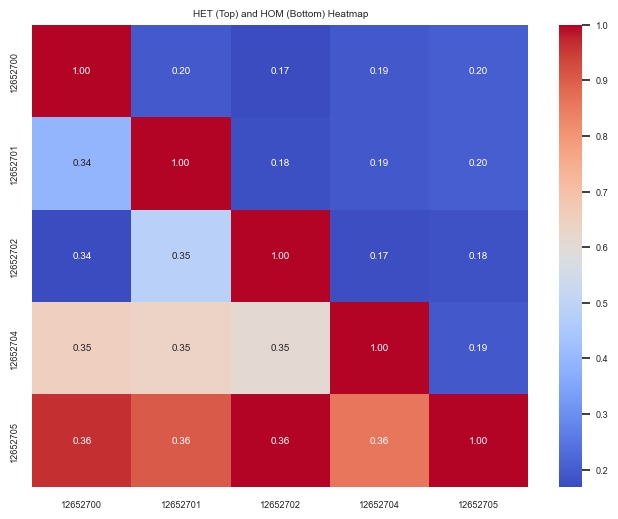

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
data = np.array([
    [1, 0.196714, 0.169209, 0.192513, 0.202234],
    [0.343755, 1, 0.178689, 0.194288, 0.201748],
    [0.336998, 0.346484, 1, 0.174976, 0.179443],
    [0.351669, 0.351246, 0.350399, 1, 0.193931],
    [0.361149, 0.359344, 0.362237, 0.357985, 1]
])

# Row and column labels
row_labels = ["12652700", "12652701", "12652702", "12652704", "12652705"]
column_labels = row_labels

het_mask = np.tri(data.shape[0], data.shape[1], -1, dtype=bool)
hom_mask = ~het_mask

fig, ax = plt.subplots(figsize=(8, 6))

# Plot HET values in the top portion (masked)
sns.heatmap(data, mask=hom_mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=False, ax=ax, 
            xticklabels=column_labels, yticklabels=row_labels)

# Plot HOM values in the bottom portion (masked)
sns.heatmap(data, mask=het_mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, ax=ax, 
            xticklabels=column_labels, yticklabels=row_labels)

plt.title("HET (Top) and HOM (Bottom) Heatmap")
plt.show()


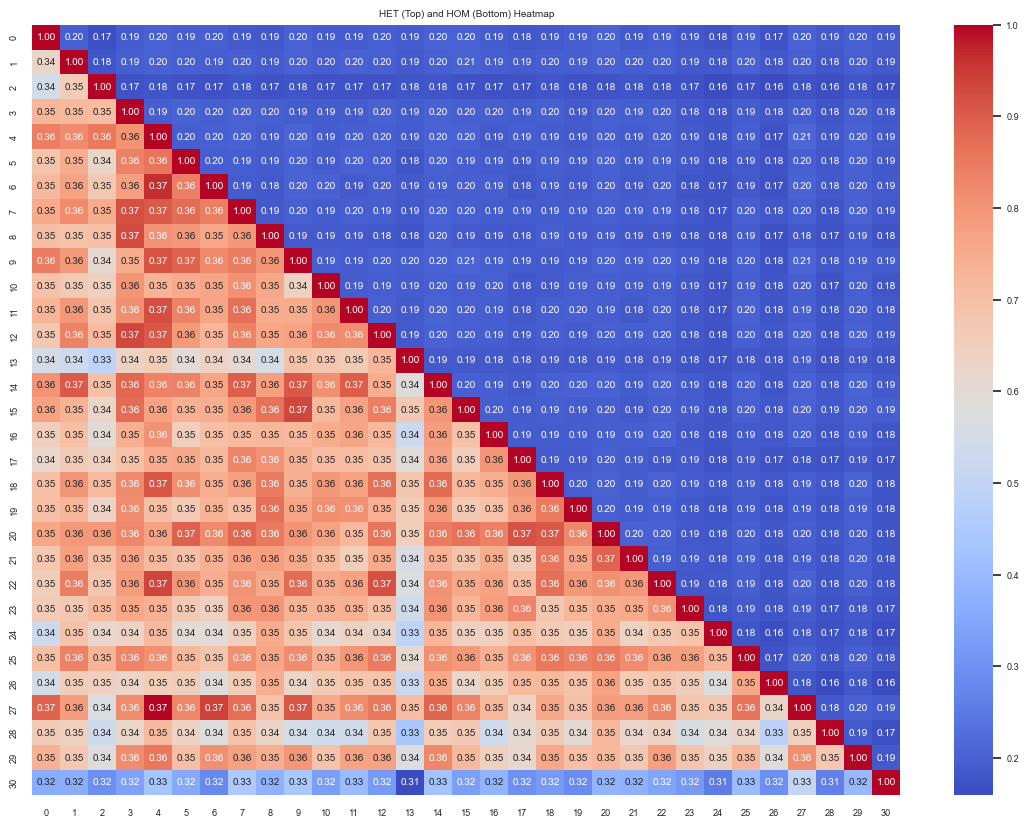

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.array([
    [1,0.196714,0.169209,0.192513,0.202234,0.194458,0.197641,0.18926,0.185845,0.200711,0.191703,0.191547,0.196564,0.19078,0.201081,0.202203,0.191444,0.181501,0.188131,0.193349,0.202748,0.187635,0.194651,0.185783,0.175331,0.193864,0.172701,0.202501,0.186738,0.198464,0.189238],
    [0.343755,1,0.178689,0.194288,0.201748,0.198205,0.192893,0.199095,0.190587,0.199526,0.195099,0.201049,0.197083,0.188648,0.198612,0.205463,0.194462,0.190176,0.195466,0.193164,0.202332,0.19512,0.198812,0.186961,0.183409,0.199433,0.183938,0.198832,0.182599,0.196451,0.18862],
    [0.336998,0.346484,1,0.174976,0.179443,0.174837,0.172178,0.176654,0.170763,0.177159,0.174047,0.174573,0.173581,0.178051,0.178116,0.174972,0.17114,0.171209,0.177178,0.175971,0.175547,0.177296,0.175659,0.173441,0.159923,0.171374,0.160533,0.175755,0.164498,0.179332,0.167555],
    [0.351669,0.351246,0.350399,1,0.193931,0.203092,0.195405,0.19963,0.195389,0.190732,0.192301,0.192737,0.20068,0.191432,0.200833,0.198051,0.195324,0.190325,0.19925,0.188689,0.197193,0.194812,0.1977,0.184763,0.178246,0.192538,0.179782,0.195914,0.178108,0.196303,0.184407],
    [0.361149,0.359344,0.362237,0.357985,1,0.195804,0.19881,0.19973,0.190273,0.202856,0.192658,0.198333,0.19816,0.191985,0.199821,0.201765,0.189436,0.192742,0.192257,0.187301,0.196696,0.189531,0.19713,0.187964,0.178558,0.194468,0.170375,0.211202,0.185905,0.20067,0.188007],
    [0.348426,0.353455,0.343535,0.361018,0.362753,1,0.195501,0.194169,0.189511,0.202195,0.190941,0.201334,0.198334,0.179397,0.200701,0.193752,0.192567,0.188301,0.193036,0.19081,0.199694,0.190379,0.194312,0.188389,0.178139,0.189161,0.175774,0.197563,0.181393,0.200361,0.185583],
    [0.350887,0.355651,0.347424,0.356048,0.371283,0.361194,1,0.191327,0.18332,0.202774,0.200774,0.188678,0.195708,0.186431,0.193049,0.19584,0.193332,0.181402,0.191326,0.186774,0.196986,0.188384,0.195144,0.178763,0.174965,0.18617,0.171457,0.202779,0.183029,0.197523,0.187028],
    [0.353874,0.359363,0.353577,0.367742,0.366373,0.363968,0.36107,1,0.189338,0.19903,0.190511,0.197499,0.193352,0.18502,0.199578,0.198098,0.192678,0.19115,0.190601,0.192484,0.198818,0.191344,0.19445,0.183311,0.174892,0.198841,0.179622,0.198611,0.178269,0.200832,0.186133],
    [0.349877,0.34886,0.349486,0.368178,0.358287,0.357061,0.354699,0.357188,1,0.189219,0.187047,0.188034,0.184835,0.177354,0.197009,0.187403,0.185605,0.182041,0.192841,0.18847,0.190446,0.185712,0.185167,0.177047,0.175657,0.190528,0.169173,0.182948,0.17285,0.190839,0.175042],
    [0.361378,0.35678,0.342029,0.353688,0.367119,0.365318,0.359468,0.361356,0.357651,1,0.193474,0.191605,0.196406,0.19599,0.20033,0.208625,0.193947,0.191728,0.18752,0.191542,0.20088,0.193608,0.200081,0.192376,0.179334,0.196885,0.176055,0.20716,0.182716,0.193058,0.189893],
    [0.349119,0.347311,0.345347,0.35796,0.352394,0.354012,0.354963,0.358537,0.354518,0.344805,1,0.19226,0.194408,0.191146,0.198544,0.193686,0.199118,0.181263,0.188262,0.193948,0.193536,0.190906,0.194524,0.185475,0.173149,0.193273,0.179079,0.195156,0.17469,0.197096,0.178621],
    [0.352113,0.35705,0.34843,0.358628,0.367927,0.360644,0.354985,0.363325,0.353585,0.353735,0.357742,1,0.198065,0.187269,0.203637,0.196313,0.194399,0.184218,0.195936,0.197159,0.193994,0.184419,0.196312,0.182826,0.174276,0.201023,0.178593,0.194112,0.177666,0.196584,0.184372],
    [0.347493,0.360769,0.350632,0.368642,0.366526,0.356744,0.351774,0.360609,0.354784,0.355633,0.35966,0.358917,1,0.18678,0.202421,0.197035,0.1938,0.188405,0.195067,0.189675,0.196405,0.19489,0.198661,0.17997,0.175998,0.197773,0.180871,0.200447,0.177976,0.201108,0.185179],
    [0.337924,0.336148,0.332593,0.344645,0.346395,0.34102,0.34443,0.341722,0.338141,0.349097,0.348092,0.346962,0.351867,1,0.188505,0.188501,0.184705,0.183772,0.187923,0.184245,0.188717,0.183543,0.187148,0.179275,0.173967,0.180669,0.177727,0.191612,0.175141,0.189227,0.179253],
    [0.357937,0.366354,0.349487,0.364549,0.360698,0.360987,0.354752,0.365769,0.355896,0.366542,0.358761,0.366007,0.353307,0.340152,1,0.198422,0.194928,0.189073,0.198994,0.199704,0.199762,0.190206,0.200207,0.189775,0.17812,0.19785,0.179145,0.199901,0.183378,0.20288,0.188219],
    [0.355518,0.35239,0.3438,0.36384,0.355466,0.352715,0.353467,0.357109,0.363077,0.368587,0.35087,0.355204,0.361141,0.347731,0.357399,1,0.195642,0.189761,0.194459,0.190516,0.196018,0.18728,0.197311,0.190758,0.177386,0.196477,0.180346,0.199772,0.185346,0.199303,0.193022],
    [0.345727,0.349698,0.341359,0.353017,0.358203,0.345492,0.349547,0.350734,0.351392,0.350967,0.353717,0.355102,0.35118,0.335258,0.356374,0.349027,1,0.189791,0.192243,0.192666,0.194361,0.192929,0.199392,0.184607,0.177579,0.187426,0.183088,0.197881,0.179571,0.193142,0.177546],
    [0.342964,0.346875,0.344951,0.349005,0.353656,0.3545,0.351052,0.360431,0.358238,0.353001,0.350426,0.350518,0.348793,0.340795,0.355212,0.34598,0.357562,1,0.187663,0.188513,0.197663,0.190246,0.185348,0.186739,0.175986,0.188142,0.173331,0.17656,0.170907,0.185487,0.170825],
    [0.349715,0.357764,0.350661,0.359517,0.366871,0.35877,0.353308,0.355785,0.361868,0.353003,0.357277,0.355453,0.363247,0.348222,0.364029,0.351562,0.353506,0.357143,1,0.195676,0.199317,0.192615,0.199583,0.191741,0.182536,0.192116,0.180274,0.193666,0.181936,0.202844,0.17957],
    [0.349691,0.351701,0.344379,0.358928,0.349893,0.34706,0.352295,0.349635,0.363396,0.354988,0.358695,0.358363,0.352749,0.34581,0.356867,0.347146,0.349025,0.355819,0.361774,1,0.197505,0.190771,0.19391,0.184795,0.179044,0.192254,0.178032,0.190731,0.176868,0.194975,0.177407],
    [0.354594,0.357118,0.356995,0.359742,0.355257,0.365486,0.359458,0.364756,0.362081,0.357896,0.355567,0.351354,0.362585,0.346028,0.361742,0.363158,0.360878,0.367404,0.366657,0.359916,1,0.199542,0.199649,0.185551,0.180589,0.196762,0.181742,0.198693,0.182442,0.196397,0.178129],
    [0.34782,0.355743,0.349316,0.355264,0.35084,0.349263,0.35276,0.355479,0.355944,0.354298,0.35065,0.346129,0.353944,0.338626,0.352448,0.348928,0.353609,0.346472,0.362502,0.354923,0.365143,1,0.194594,0.18713,0.181629,0.194388,0.177102,0.191542,0.178545,0.196102,0.176555],
    [0.345829,0.361363,0.347999,0.356528,0.369094,0.357678,0.353392,0.358323,0.354276,0.363963,0.354164,0.355424,0.367529,0.339287,0.35814,0.354342,0.355595,0.350553,0.363231,0.357224,0.358365,0.357227,1,0.185447,0.184081,0.194092,0.176857,0.200416,0.178094,0.196859,0.178663],
    [0.346585,0.347555,0.350745,0.354536,0.352974,0.347273,0.345385,0.357289,0.357781,0.352194,0.352622,0.352911,0.34974,0.336462,0.357863,0.351878,0.356037,0.360475,0.348022,0.351426,0.353662,0.354038,0.358295,1,0.176701,0.189079,0.17658,0.190514,0.173403,0.184926,0.173715],
    [0.335341,0.348949,0.342832,0.344334,0.351066,0.341308,0.341131,0.345049,0.353689,0.3484,0.342101,0.344803,0.344034,0.332628,0.351881,0.345078,0.345402,0.349558,0.346808,0.345879,0.353713,0.344891,0.34742,0.348715,1,0.179544,0.164414,0.182769,0.173043,0.181648,0.165462],
    [0.349705,0.360748,0.351952,0.360478,0.358553,0.351459,0.348344,0.358525,0.354665,0.359149,0.352715,0.357291,0.361678,0.342046,0.358515,0.356881,0.352736,0.358271,0.362171,0.360901,0.361922,0.359419,0.356174,0.356142,0.351446,1,0.173823,0.197759,0.176745,0.196562,0.176765],
    [0.337192,0.346344,0.345211,0.343694,0.346087,0.345789,0.34055,0.34644,0.353261,0.343567,0.346714,0.348677,0.348356,0.334884,0.354178,0.343219,0.346373,0.3508,0.351134,0.348764,0.35551,0.347068,0.348081,0.345853,0.33952,0.354454,1,0.17642,0.16069,0.181206,0.162403],
    [0.36521,0.356728,0.338935,0.359281,0.374199,0.359784,0.369317,0.363716,0.348968,0.366903,0.354193,0.359309,0.362167,0.350366,0.364848,0.36064,0.351476,0.34428,0.35445,0.349402,0.356535,0.356452,0.35997,0.34818,0.347667,0.36285,0.343689,1,0.184729,0.199099,0.18983],
    [0.346657,0.345316,0.33626,0.343563,0.350829,0.344648,0.340038,0.349199,0.343825,0.337319,0.336453,0.336853,0.34739,0.328784,0.346481,0.347284,0.336493,0.34215,0.346596,0.341833,0.351443,0.34329,0.344556,0.338347,0.340498,0.343173,0.331817,0.345225,1,0.187856,0.168372],
    [0.352546,0.347716,0.34002,0.358895,0.362289,0.349804,0.358884,0.355759,0.353107,0.357354,0.348891,0.355541,0.355194,0.339271,0.359933,0.350941,0.345093,0.34269,0.354524,0.349581,0.351466,0.347597,0.356044,0.34847,0.345163,0.351514,0.34027,0.358811,0.347846,1,0.188357],
    [0.321897,0.322354,0.316361,0.319803,0.327603,0.321426,0.315335,0.32885,0.322985,0.328698,0.319282,0.325308,0.318368,0.305446,0.327044,0.319239,0.323671,0.316608,0.318451,0.31589,0.32365,0.323052,0.320402,0.318169,0.313043,0.325192,0.316388,0.333698,0.314036,0.32471,1]
])

# Row and column labels
row_labels = ["12652700","12652701","12652702","12652704","12652705","12652707","12652709","12652710","12652711","12652712","12652713","12652716","12652717","12652719","12652720","12652721","17751395","17751397","17751403","17751404","17751405","17751406","17751408","17751409","17751410","17751411","17751412","17751413","17751414","17856303","19532336"]
column_labels = row_labels

het_mask = np.tri(data.shape[0], data.shape[1], -1, dtype=bool)
hom_mask = ~het_mask

fig, ax = plt.subplots(figsize=(14, 10))

# Plot HET values in the top portion (masked)
sns.heatmap(data, mask=hom_mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=False, ax=ax)

# Plot HOM values in the bottom portion (masked)
sns.heatmap(data, mask=het_mask, cmap="coolwarm", annot=True, fmt=".2f", cbar=True, ax=ax)

plt.title("HET (Top) and HOM (Bottom) Heatmap")
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/OUTPUT_data_map/new_HET_HOM_Similarity_Heatmap.png', dpi=1000, bbox_inches='tight')
plt.show()

In [5]:
import os
import pandas as pd

def process_tsv_file(file_path, output_folder):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Define the subset of columns to consider for duplicates
    subset_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT']

    # Drop duplicates based on the subset of columns
    df.drop_duplicates(subset=subset_columns, inplace=True)

    # Convert selected columns to strings and then create the "CONCAT" column
    df[subset_columns] = df[subset_columns].astype(str)
    df['CONCAT'] = df[subset_columns].apply('_'.join, axis=1)

    # Create a new DataFrame with a column named after the file name
    filename_without_extension = os.path.splitext(os.path.basename(file_path))[0]
    df_with_filename = df[['CONCAT']].rename(columns={'CONCAT': filename_without_extension})

    # Save the DataFrame with the file name as a new TSV file in the output folder
    output_file = os.path.join(output_folder, f'{filename_without_extension}.tsv')
    df_with_filename.to_csv(output_file, sep='\t', index=False)

input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Process each TSV file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(input_folder, filename)
        process_tsv_file(file_path, output_folder)

# Create an empty DataFrame to store the final concatenated data
final_df = pd.DataFrame()

# Read each processed TSV file and append the data to the final DataFrame
for filename in os.listdir(output_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(output_folder, filename)
        df = pd.read_csv(file_path, sep='\t')
        final_df = pd.concat([final_df, df], axis=1)

# Save the final DataFrame to an Excel file
excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/concatenated.xlsx'
final_df.to_excel(excel_output_file, index=False)

In [23]:
import os
import pandas as pd

def process_tsv_file(file_path, output_folder):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Define the subset of columns to consider for duplicates
    subset_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'GT']  # Include 'GT' column

    # Drop duplicates based on the subset of columns
    df.drop_duplicates(subset=subset_columns, inplace=True)

    # Convert selected columns to strings and then create the "CONCAT" column
    df[subset_columns] = df[subset_columns].astype(str)
    df['CONCAT'] = df[subset_columns].apply('_'.join, axis=1)

    # Create a new DataFrame with columns 'CONCAT' and 'GT'
    df_with_columns = df[['CONCAT', 'GT']]

    # Save the DataFrame as a new TSV file in the output folder
    output_file = os.path.join(output_folder, os.path.basename(file_path))
    df_with_columns.to_csv(output_file, sep='\t', index=False)

input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Process each TSV file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(input_folder, filename)
        process_tsv_file(file_path, output_folder)

# Create an empty DataFrame to store the final concatenated data
final_df = None

# Read each processed TSV file and append the data to the final DataFrame
for filename in os.listdir(output_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(output_folder, filename)
        df = pd.read_csv(file_path, sep='\t')
        if final_df is None:
            final_df = df
        else:
            final_df = pd.concat([final_df, df], axis=1)

# Save the final DataFrame to an Excel file
excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/concatenated.xlsx'
final_df.to_excel(excel_output_file, index=False)

In [24]:
import os
import pandas as pd

# Specify the directory where your TSV files are located
tsv_directory = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Initialize empty DataFrames for HET and HOM
het_df = pd.DataFrame()
hom_df = pd.DataFrame()

# Loop through all TSV files in the directory
for filename in os.listdir(tsv_directory):
    if filename.endswith('.tsv'):
        file_path = os.path.join(tsv_directory, filename)
        
        # Read the TSV file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
        
        # Check if 'GT' column contains '0/1' or '1/1' and split into HET and HOM accordingly
        het_rows = df[df['GT'] == '0/1']
        hom_rows = df[df['GT'] == '1/1']
        
        # Add a new column with the file name for reference
        het_rows['Filename'] = filename
        hom_rows['Filename'] = filename
        
        # Concatenate HET and HOM rows to the respective DataFrames
        het_df = pd.concat([het_df, het_rows], ignore_index=True)
        hom_df = pd.concat([hom_df, hom_rows], ignore_index=True)

# Create Excel sheets
with pd.ExcelWriter(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/output.xlsx') as writer:
    het_df.to_excel(writer, sheet_name='HET', index=False)
    hom_df.to_excel(writer, sheet_name='HOM', index=False)


In [25]:
import pandas as pd

def split_data(concatenated_path, het_path, hom_path):
    # Load your concatenated excel sheet
    concatenated_df = pd.read_excel(concatenated_path)

    # Load your HET and HOM excel sheets
    het_df = pd.read_excel(het_path)
    hom_df = pd.read_excel(hom_path)

    # Iterate through each row in the concatenated DataFrame and distribute the rows based on the GT column values
    for index, row in concatenated_df.iterrows():
        gt_value = row['GT']

        if gt_value == '0/1':
            # Append the row to HET dataframe
            het_df = het_df.append(row, ignore_index=True)
        elif gt_value == '1/1':
            # Append the row to HOM dataframe
            hom_df = hom_df.append(row, ignore_index=True)

    # Save the updated HET and HOM DataFrames back to their respective excel files
    het_df.to_excel(het_path, index=False)
    hom_df.to_excel(hom_path, index=False)

# Specify the file paths
concatenated_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/concatenated.xlsx'
het_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/HET_31_samples_variants_concatenated.xlsx'
hom_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/HOM_31_samples_variants_concatenated.xlsx'

# Call the function to split the data
split_data(concatenated_path, het_path, hom_path)

KeyboardInterrupt: 

In [11]:
import os
import pandas as pd

def process_tsv_file(file_path, output_folder):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Define the subset of columns to consider for duplicates
    subset_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'GT']

    # Drop duplicates based on the subset of columns
    df.drop_duplicates(subset=subset_columns, inplace=True)

    # Convert selected columns to strings and then create the "CONCAT" column
    df[subset_columns[:-1]] = df[subset_columns[:-1]].astype(str)
    df['CONCAT'] = df[subset_columns[:-1]].apply('_'.join, axis=1)

    # Create a new DataFrame with a column named after the file name
    filename_without_extension = os.path.splitext(os.path.basename(file_path))[0]
    df_with_filename = df[['CONCAT', 'GT']].rename(columns={'CONCAT': filename_without_extension, 'GT': f'{filename_without_extension}_GT'})

    # Save the DataFrame with the file name as a new TSV file in the output folder
    output_file = os.path.join(output_folder, f'{filename_without_extension}.tsv')
    df_with_filename.to_csv(output_file, sep='\t', index=False)

input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Process each TSV file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(input_folder, filename)
        process_tsv_file(file_path, output_folder)

# Create an empty DataFrame to store the final concatenated data
final_df = pd.DataFrame()

# Create separate DataFrames for HOM and HET rows
hom_df = pd.DataFrame()
het_df = pd.DataFrame()

# Read each processed TSV file and append the data to the final DataFrame and separate DataFrames
for filename in os.listdir(output_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(output_folder, filename)
        df = pd.read_csv(file_path, sep='\t')
        filename_without_extension = os.path.splitext(filename)[0]  # Get filename without extension
        
        # Append GT column to the final DataFrame
        final_df[filename_without_extension] = df['GT']
        
        # Filter HOM and HET rows and append them to the respective DataFrames
        hom_rows = df[df['GT'] == '1/1']
        het_rows = df[df['GT'] == '0/1']
        hom_df = pd.concat([hom_df, hom_rows], ignore_index=True)
        het_df = pd.concat([het_df, het_rows], ignore_index=True)

# Save the final DataFrame to an Excel file
excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/concatenated.xlsx'
final_df.to_excel(excel_output_file, index=False)

# Save HOM and HET DataFrames to separate Excel files
hom_excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/hom_concatenated.xlsx'
het_excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/het_concatenated.xlsx'

hom_df.to_excel(hom_excel_output_file, index=False)
het_df.to_excel(het_excel_output_file, index=False)

KeyError: 'GT'

In [13]:
import os
import pandas as pd

# Specify the folder containing your TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Initialize two dataframes for HET and HOM sheets
het_df = pd.DataFrame()
hom_df = pd.DataFrame()

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".tsv"):
        file_path = os.path.join(folder_path, filename)
        
        # Read the TSV file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
        
        # Filter rows based on GT column
        het_rows = df[df['GT'] == '0/1']
        hom_rows = df[df['GT'] == '1/1']
        
        # Add columns using file names
        het_df[filename] = het_rows['GT']
        hom_df[filename] = hom_rows['GT']

# Create Excel files with HET and HOM sheets
with pd.ExcelWriter(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/output.xlsx') as writer:
    het_df.to_excel(writer, sheet_name='HET', index=False)
    hom_df.to_excel(writer, sheet_name='HOM', index=False)

KeyError: 'GT'

In [17]:
import os
import pandas as pd

# Specify the folder containing your TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Initialize two dataframes for HET and HOM sheets
het_df = pd.DataFrame()
hom_df = pd.DataFrame()

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".tsv"):
        file_path = os.path.join(folder_path, filename)
        
        # Read the TSV file into a DataFrame
        df = pd.read_csv(file_path, sep='\t')
        
        # Find column names ending with '_Depth_GT'
        gt_columns = [col for col in df.columns if col.endswith('_Depth_GT')]
        
        # Filter rows based on GT columns
        het_rows = df[df[gt_columns].eq('0/1').any(axis=1)]
        hom_rows = df[df[gt_columns].eq('1/1').any(axis=1)]
        
        # Add columns using file names
        for col in df.columns:
            if col not in het_df.columns:
                het_df[col] = None
                hom_df[col] = None
        
        het_df[filename] = het_rows.values.flatten()
        hom_df[filename] = hom_rows.values.flatten()

# Create Excel files with HET and HOM sheets
with pd.ExcelWriter(r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/output.xlsx') as writer:
    het_df.to_excel(writer, sheet_name='HET', index=False)
    hom_df.to_excel(writer, sheet_name='HOM', index=False)

ValueError: Length of values (52340) does not match length of index (58368)

In [19]:
import os
import pandas as pd

# Folder containing the TSV files
folder_path = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# List all TSV files in the folder
tsv_files = [f for f in os.listdir(folder_path) if f.endswith('.tsv')]

# Initialize dataframes for HET and HOM
het_df = pd.DataFrame()
hom_df = pd.DataFrame()

# Loop through each TSV file
for file_name in tsv_files:
    file_path = os.path.join(folder_path, file_name)
    
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')
    
    # Check if the column names *_Depth and *_DepthGT exist
    depth_col_name = file_name.replace('.tsv', '_Depth')
    depth_gt_col_name = file_name.replace('.tsv', '_DepthGT')
    
    if depth_col_name in df.columns and depth_gt_col_name in df.columns:
        # Extract the relevant columns
        depth_col = df[depth_col_name]
        depth_gt_col = df[depth_gt_col_name]
        
        # Filter rows for HET and HOM
        het_rows = df[(depth_gt_col == '0/1') | (depth_gt_col == '1/0')]
        hom_rows = df[depth_gt_col == '1/1']
        
        # Add columns to the result dataframes
        het_df[file_name] = depth_col[het_rows.index]
        hom_df[file_name] = depth_col[hom_rows.index]

# Write the dataframes to Excel files
het_df.to_excel(os.path.join(folder_path, 'HET.xlsx'), index=False, engine='openpyxl')
hom_df.to_excel(os.path.join(folder_path, 'HOM.xlsx'), index=False, engine='openpyxl')


In [3]:
import os
import pandas as pd

def process_tsv_file(file_path, output_folder):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Define the subset of columns to consider for duplicates
    subset_columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT']

    # Drop duplicates based on the subset of columns
    df.drop_duplicates(subset=subset_columns, inplace=True)

    # Convert selected columns to strings and then create the "CONCAT" column
    df[subset_columns] = df[subset_columns].astype(str)
    df['CONCAT'] = df[subset_columns].apply('_'.join, axis=1)

    # Save the DataFrame to a new TSV file in the output folder
    output_file = os.path.join(output_folder, os.path.basename(file_path))
    df.to_csv(output_file, sep='\t', index=False)

input_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/'
output_folder = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/'

# Create an empty DataFrame to store the "CONCAT" columns
concat_df = pd.DataFrame()

for filename in os.listdir(input_folder):
    if filename.endswith('.tsv'):
        file_path = os.path.join(input_folder, filename)
        process_tsv_file(file_path, output_folder)
        
        # Read the processed TSV file and append the "CONCAT" column to the concat_df
        processed_df = pd.read_csv(os.path.join(output_folder, filename), sep='\t')
        concat_df = pd.concat([concat_df, processed_df['CONCAT']], axis=1)

# Save the concatenated "CONCAT" columns to an Excel file
excel_output_file = r'C:/Users/GenepoweRx_Madhu/Downloads/Depth_files_31_mody/COVERED_TSV/Covered_new/final_CHROM_POS/concatenated.xlsx'
concat_df.to_excel(excel_output_file, index=False)

KeyboardInterrupt: 